# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\karri\OneDrive\Desktop\Customer_Data.csv")

In [4]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary:\n", df.describe())

Shape: (8950, 18)

Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Duplicates: 0

Data Types:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES          

# Preprocess The Data

In [5]:
df_cleaned = df.drop('CUST_ID', axis=1)
df_cleaned['MINIMUM_PAYMENTS'].fillna(df_cleaned['MINIMUM_PAYMENTS'].median(), inplace=True)
df_cleaned['CREDIT_LIMIT'].fillna(df_cleaned['CREDIT_LIMIT'].median(), inplace=True)

# Scale the Data

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Elbow  Method

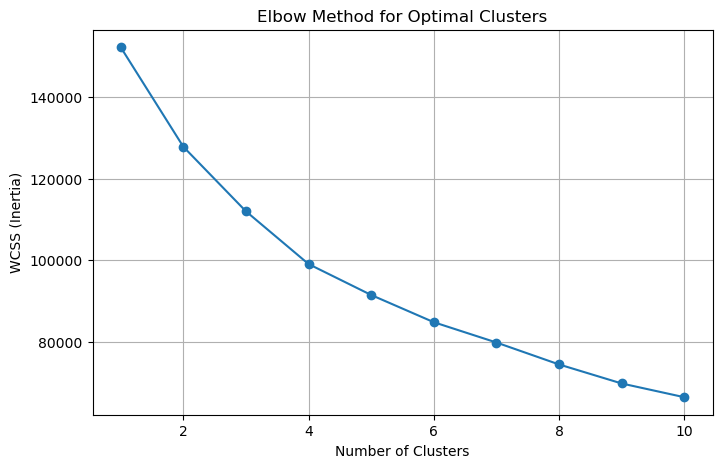

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

# Kmeans Clustering

In [8]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Principle Component Analysis

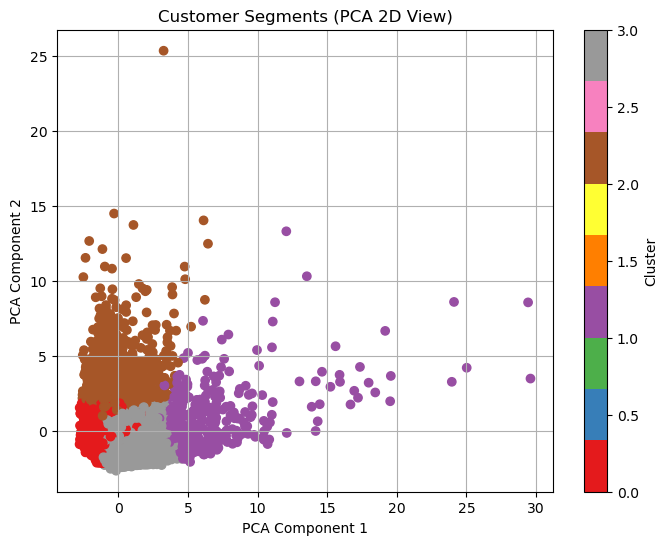

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='Set1')
plt.title("Customer Segments (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# PairPlot 

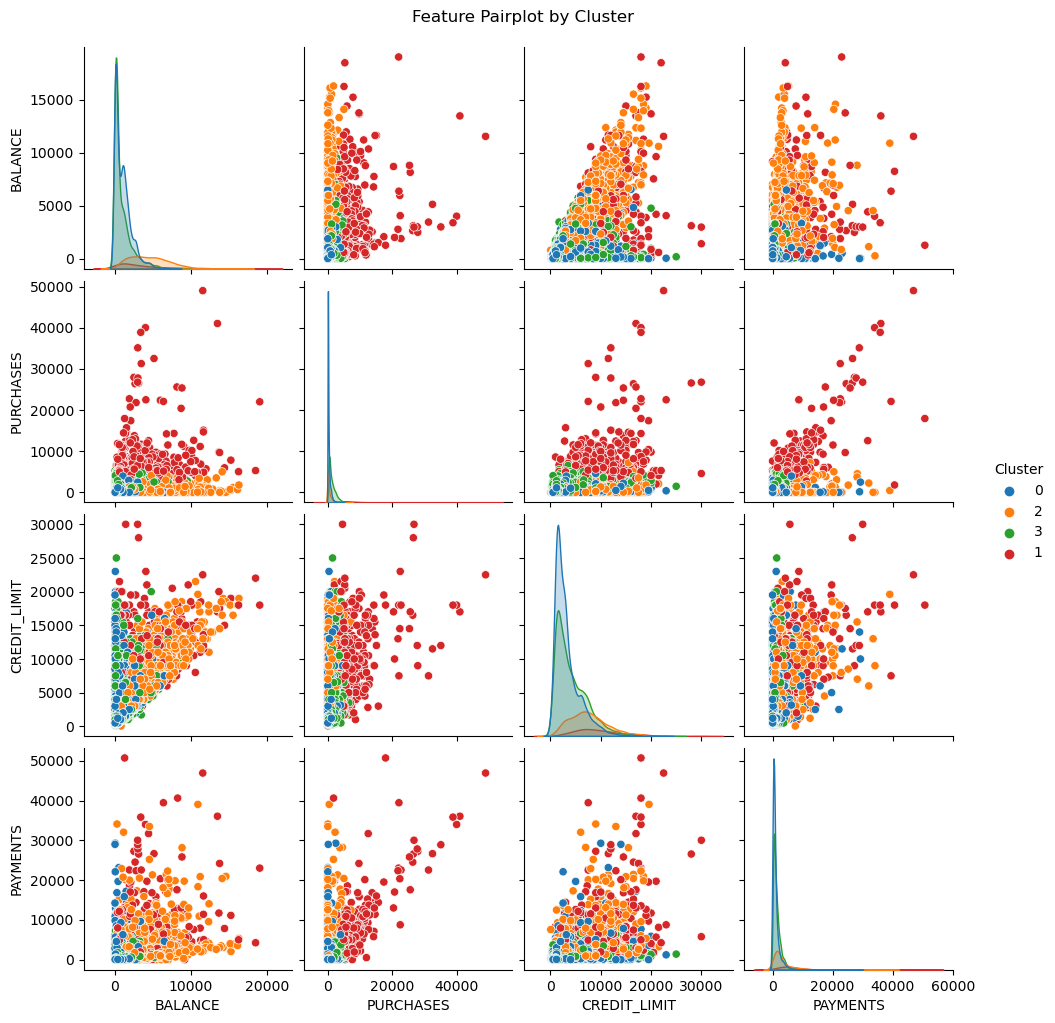

In [10]:
viz_df = df.copy()
viz_df['Cluster'] = df['Cluster'].astype(str)
sns.pairplot(viz_df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'Cluster']], hue='Cluster')
plt.suptitle("Feature Pairplot by Cluster", y=1.02)
plt.show()

In [11]:
print("\nCluster Summary (Means):\n", df.groupby('Cluster').mean(numeric_only=True))


Cluster Summary (Means):
              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1012.658327           0.789924   270.041785        209.937299   
1        3551.153761           0.986879  7681.620098       5095.878826   
2        4602.449658           0.968389   501.862982        320.188797   
3         894.907458           0.934734  1236.178934        593.974874   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     60.371441    596.509903             0.170145   
1                   2587.208264    653.638891             0.946418   
2                    181.759123   4521.509581             0.287832   
3                    642.478274    210.570626             0.885165   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                           